# Regresión logística

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

In [115]:
# Load train data
train = pd.read_csv('./data/train_clean.csv')
# train = pd.read_csv('./data/train_clean_LR_2col.csv')
# train = pd.read_csv('./data/train_clean_LR_First_GS.csv')
test = pd.read_csv('./data/test_clean.csv')
# test = pd.read_csv('./data/test_clean_LR_2col.csv')
# test = pd.read_csv('./data/test_clean_LR_First_GS.csv')

test_results = pd.read_csv('./data/gender_submission.csv')

# Merge test results with test data where PassengerId is the same
test = pd.merge(test, test_results, on='PassengerId')

# Print the list of columns
print(train.columns)

# Drop 'PassengerId'
train.drop('PassengerId', axis=1, inplace=True)
test.drop('PassengerId', axis=1, inplace=True)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'Fare', 'Group_Size',
       'Embarked_0', 'Embarked_1', 'Embarked_2', 'Sex_0', 'Sex_1'],
      dtype='object')


In [116]:
# Drop the columns that are not needed in the train dataset
x_train = train.drop('Survived', axis=1)
y_train = train['Survived']
print(x_train.columns)

# Drop the columns that are not needed in the test dataset
x_test = test.drop('Survived', axis=1)
y_test = test['Survived']
print(x_test.columns)

Index(['Pclass', 'Age', 'Fare', 'Group_Size', 'Embarked_0', 'Embarked_1',
       'Embarked_2', 'Sex_0', 'Sex_1'],
      dtype='object')
Index(['Pclass', 'Age', 'Fare', 'Group_Size', 'Embarked_0', 'Embarked_1',
       'Embarked_2', 'Sex_0', 'Sex_1'],
      dtype='object')


In [117]:
# Use GridSearchCV to find best parameters
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': np.logspace(-4,4,10),
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}
grid_search = GridSearchCV(LogisticRegression(), param_grid)
grid_search.fit(x_train, y_train)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')

Best parameters: {'C': 0.3593813663804626, 'solver': 'lbfgs'}
Best score: 0.7975369770837301


Accuracy: 93.0%
Precision: 89.0%


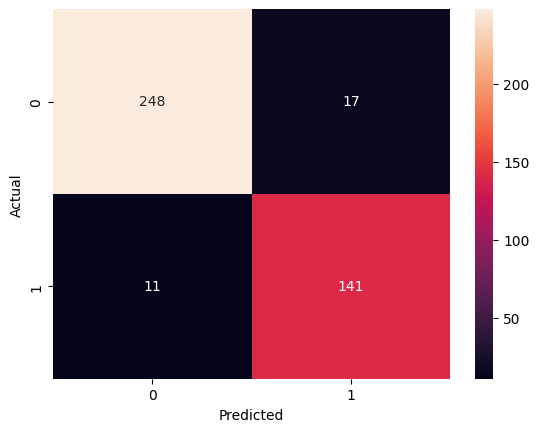

In [119]:
# Predict with best parameters
y_pred = grid_search.predict(x_test)
accuracy = grid_search.score(x_test, y_test)
precision = precision_score(y_test, y_pred)
print(f'Accuracy: {accuracy.round(2)*100}%')
print(f'Precision: {precision.round(2)*100}%')

# Confusion Matrix plot
confusion_matrix_2 = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(confusion_matrix_2, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()